In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn import feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.decomposition import PCA

In [14]:
data_path = './dataset'
train_data = pd.read_csv('./dataset/processed_data/frequency_knn.csv')
train_label = pd.read_csv(data_path + '/train_y.csv')

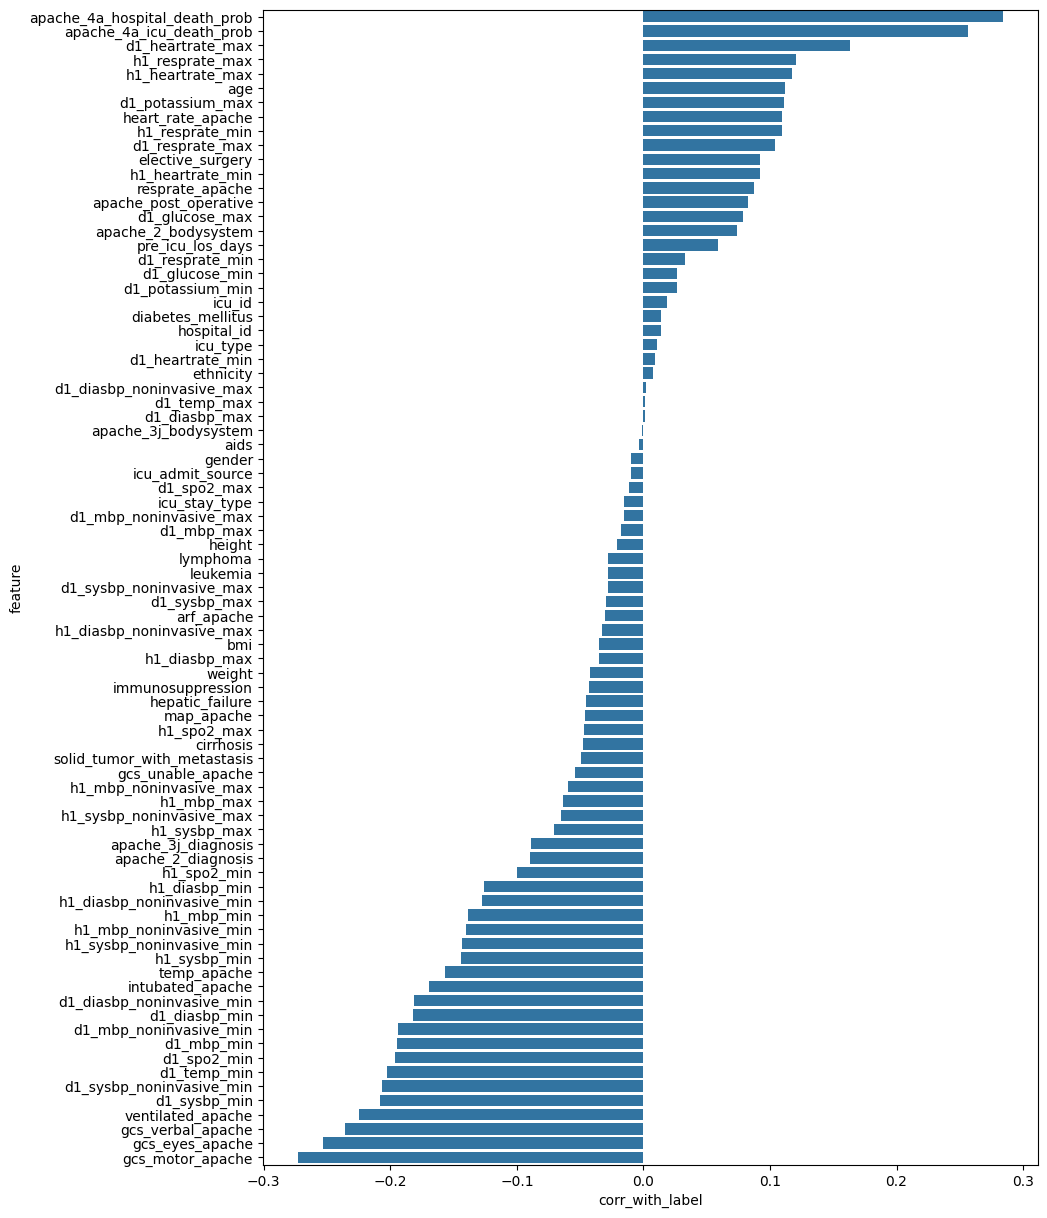

In [16]:
# biserial correlation coefficient for each feature and label
# plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Assuming df is your DataFrame and 'label' is your binary target variable
features = train_data.columns
correlations = [pointbiserialr(train_data[feature], train_label['has_died'])[0] for feature in features]

# Create a DataFrame for better visualization
corr_df = pd.DataFrame({'feature': features, 'corr_with_label': correlations})

# Sort the DataFrame based on the correlation values
corr_df = corr_df.sort_values(by='corr_with_label', ascending=False)

# Plot the DataFrame
plt.figure(figsize=(10, 15))
sns.barplot(x='corr_with_label', y='feature', data=corr_df)
plt.show()

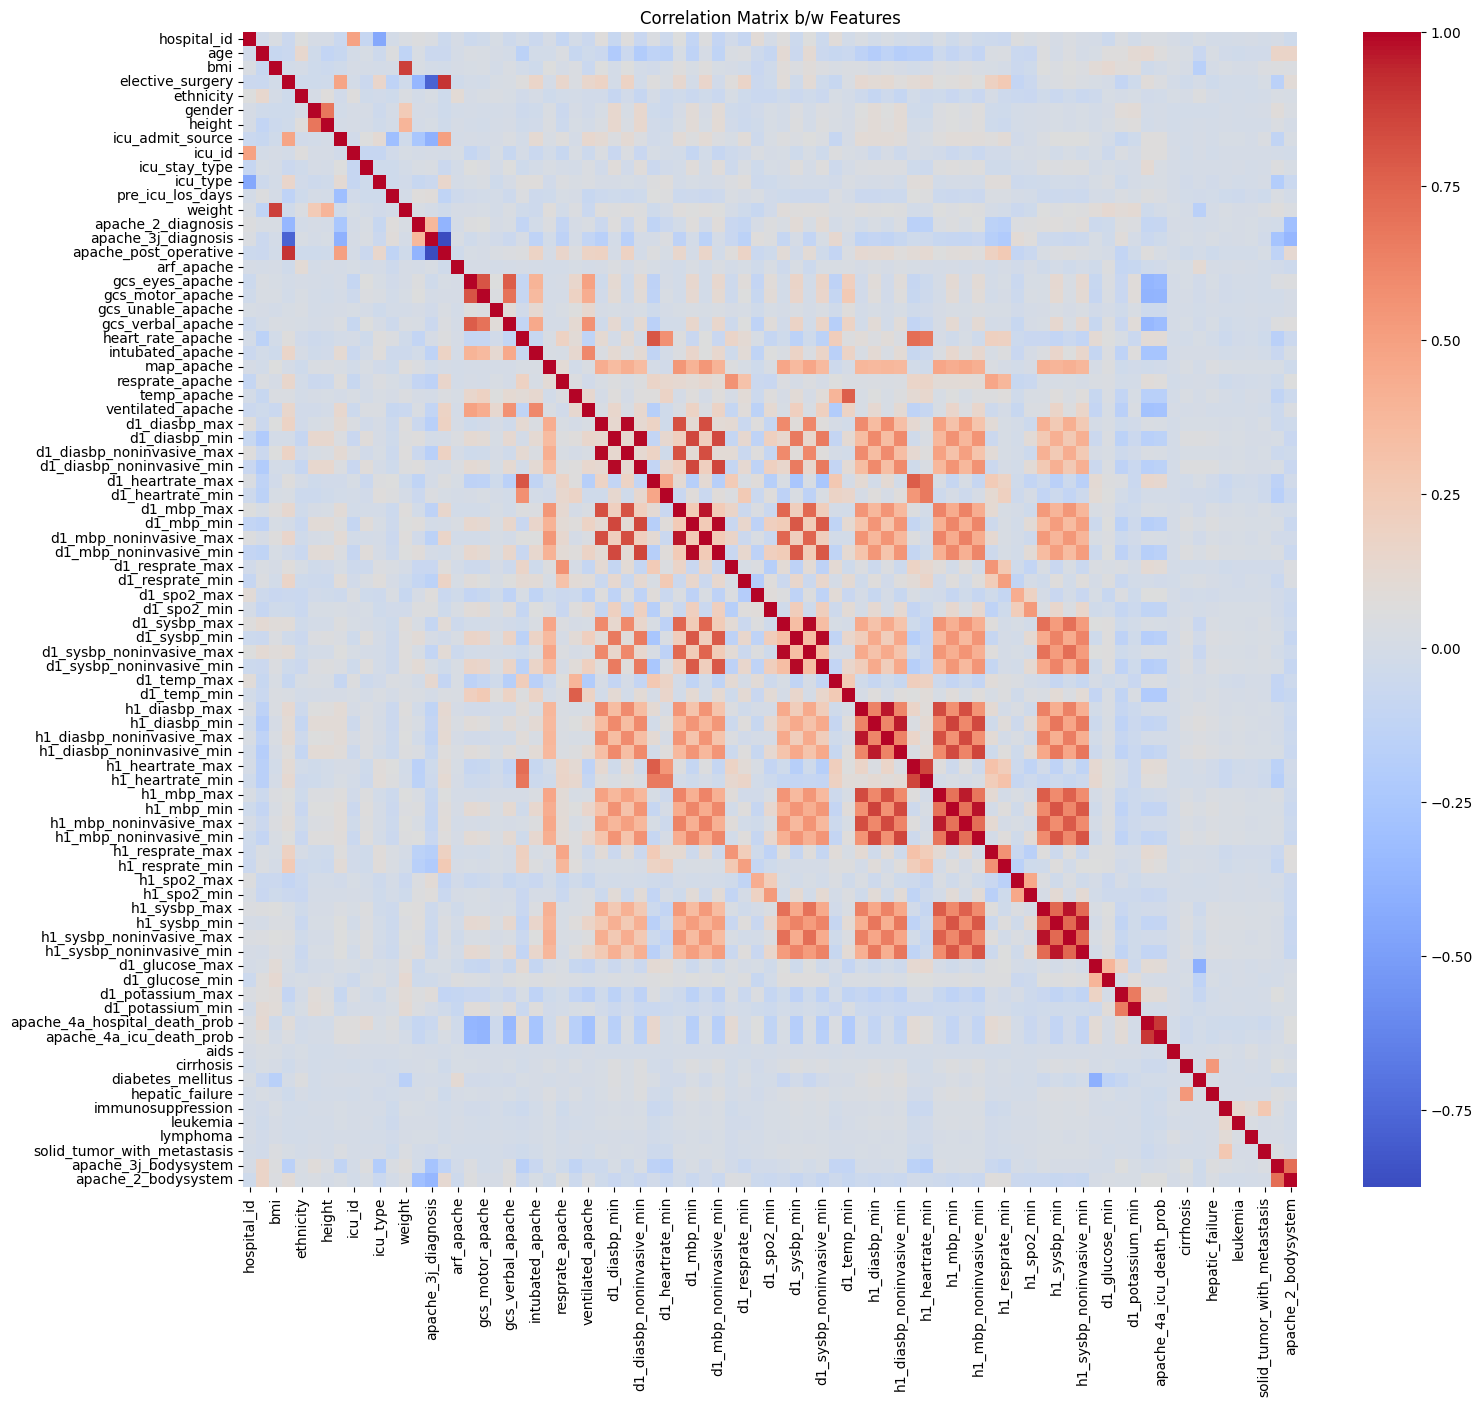

In [27]:
# correlation matrix of each feature in train_data
# plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
corr = train_data.corr()

# Enlarge the gap between each feature in the heatmap by increasing the figure size
plt.figure(figsize=(17, 15))  # Adjust the 0.5 to increase or decrease the gap

# Plotting
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix b/w Features')
plt.show()
